## Basics of Time Series, useful utilities

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from datetime import datetime
from dateutil.parser import parse

In [2]:
now = datetime.now()
now

datetime.datetime(2025, 4, 7, 14, 16, 9, 70358)

### Parse with the help of Dateutil
Try different expressions and see if it works correctly

In [3]:
parse('Jan 30, 2023 10:45:7.5667 PM')

datetime.datetime(2023, 1, 30, 22, 45, 7, 566700)

## Generate a time series, note the use of ranges for dates, the number of periods and frequencies. Note how the data can be shifted
Try different frequencies like BM, W-MON, D, H and study the results


In [4]:
ts = pd.Series(np.random.randn(10),
    index=pd.date_range('1/1/2020', periods=10, freq='BM'))
print(ts)
print(ts.shift(-1))
ts / ts.shift(-1) - 1

2020-01-31    0.857382
2020-02-28    1.416936
2020-03-31    1.220245
2020-04-30   -2.488110
2020-05-29    0.491845
2020-06-30    1.370599
2020-07-31    0.062063
2020-08-31   -0.102551
2020-09-30   -0.179122
2020-10-30   -0.308095
Freq: BM, dtype: float64
2020-01-31    1.416936
2020-02-28    1.220245
2020-03-31   -2.488110
2020-04-30    0.491845
2020-05-29    1.370599
2020-06-30    0.062063
2020-07-31   -0.102551
2020-08-31   -0.179122
2020-09-30   -0.308095
2020-10-30         NaN
Freq: BM, dtype: float64


2020-01-31    -0.394904
2020-02-28     0.161190
2020-03-31    -1.490431
2020-04-30    -6.058728
2020-05-29    -0.641146
2020-06-30    21.083864
2020-07-31    -1.605192
2020-08-31    -0.427477
2020-09-30    -0.418615
2020-10-30          NaN
Freq: BM, dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

In [5]:
p = pd.Period(2019, freq='A-DEC')
print(p, p.freq)
p+2

2019 <YearEnd: month=12>


Period('2021', 'A-DEC')

## Example of Sampling
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

In [6]:
rng2=pd.date_range('6/1/2020 03:58:00', periods = 8, freq='min')
ts2 = pd.Series(range(len(rng2)), index=rng2)
ts2

2020-06-01 03:58:00    0
2020-06-01 03:59:00    1
2020-06-01 04:00:00    2
2020-06-01 04:01:00    3
2020-06-01 04:02:00    4
2020-06-01 04:03:00    5
2020-06-01 04:04:00    6
2020-06-01 04:05:00    7
Freq: T, dtype: int64

In [18]:
#ts2.resample('5T').ohlc()

In [19]:
#Left Labels, Left Closed
#ts2.resample('2T').sum()

In [7]:
ts2.resample('2T',label='right',
             closed='right').sum()

2020-06-01 03:58:00     0
2020-06-01 04:00:00     3
2020-06-01 04:02:00     7
2020-06-01 04:04:00    11
2020-06-01 04:06:00     7
Freq: 2T, dtype: int64

In [8]:
ts2.resample('30S').pad()[0:20]

C:\Users\hp\AppData\Local\Temp\ipykernel_13768\2000201141.py:1: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  ts2.resample('30S').pad()[0:20]


2020-06-01 03:58:00    0
2020-06-01 03:58:30    0
2020-06-01 03:59:00    1
2020-06-01 03:59:30    1
2020-06-01 04:00:00    2
2020-06-01 04:00:30    2
2020-06-01 04:01:00    3
2020-06-01 04:01:30    3
2020-06-01 04:02:00    4
2020-06-01 04:02:30    4
2020-06-01 04:03:00    5
2020-06-01 04:03:30    5
2020-06-01 04:04:00    6
2020-06-01 04:04:30    6
2020-06-01 04:05:00    7
Freq: 30S, dtype: int64

In [9]:
ts2.resample('30S').interpolate(method='linear', limit=2)

2020-06-01 03:58:00    0.0
2020-06-01 03:58:30    0.5
2020-06-01 03:59:00    1.0
2020-06-01 03:59:30    1.5
2020-06-01 04:00:00    2.0
2020-06-01 04:00:30    2.5
2020-06-01 04:01:00    3.0
2020-06-01 04:01:30    3.5
2020-06-01 04:02:00    4.0
2020-06-01 04:02:30    4.5
2020-06-01 04:03:00    5.0
2020-06-01 04:03:30    5.5
2020-06-01 04:04:00    6.0
2020-06-01 04:04:30    6.5
2020-06-01 04:05:00    7.0
Freq: 30S, dtype: float64

### More examples on 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

# Data Analysis Example begins here

In [86]:
#Load the data
#data = pd.read_csv(r"C:\Users\gagan\Desktop\IITBh\DS250\0_Projects\Datasets\Expense.csv")
data=pd.read_csv("expense_data_1.csv")

In [87]:
data.shape

(277, 11)

In [88]:
data

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [89]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [90]:
print(data.columns.tolist())


['Date', 'Account', 'Category', 'Subcategory', 'Note', 'INR', 'Income/Expense', 'Note.1', 'Amount', 'Currency', 'Account.1']


In [96]:
data.reset_index(inplace=True)

In [97]:
data = data[['Date', 'Amount']]

In [98]:
print(data.columns.tolist())

['Date', 'Amount']


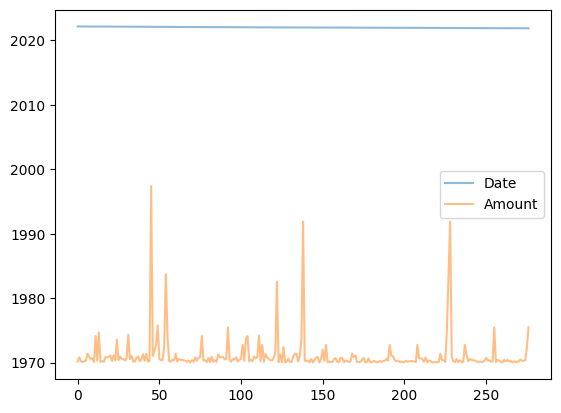

In [99]:
data.plot(alpha=0.5, style='-')
plt.show()

## Converting Time to be an index, to make calculations easier

In [100]:
data['Date']= pd.to_datetime(data['Date'])
# Set the index to the 'date' column
data.set_index('Date', inplace = True)
data.dtypes


Amount    float64
dtype: object

In [101]:
data.head()

,Amount
Date,
2022-03-02 10:11:00,50.0
2022-03-02 10:11:00,300.0
2022-03-01 19:50:00,78.0
2022-03-01 18:56:00,30.0
2022-03-01 18:22:00,67.0


In [102]:
data.describe()

,Amount
count,277.000000
mean,406.759134
std,1065.158318
min,3.000000
25%,50.000000
50%,125.000000
75%,300.000000
max,10000.000000


<Figure size 8000x1500 with 0 Axes>

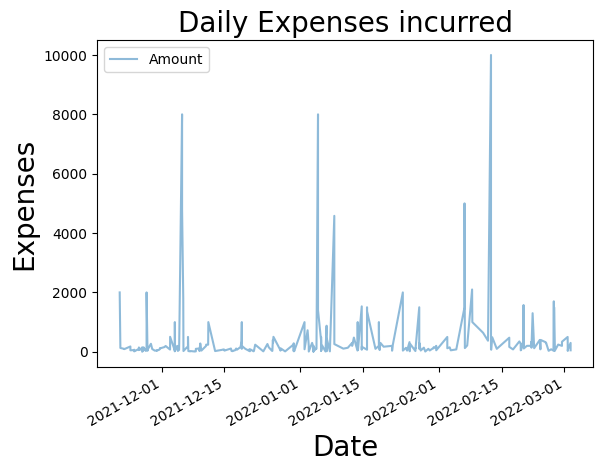

In [103]:
plt.figure(figsize=(80, 15))
data.plot(alpha=0.5, style='-')
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Sampling makes the chart easier to interpret while losing information

<Axes: xlabel='Date'>

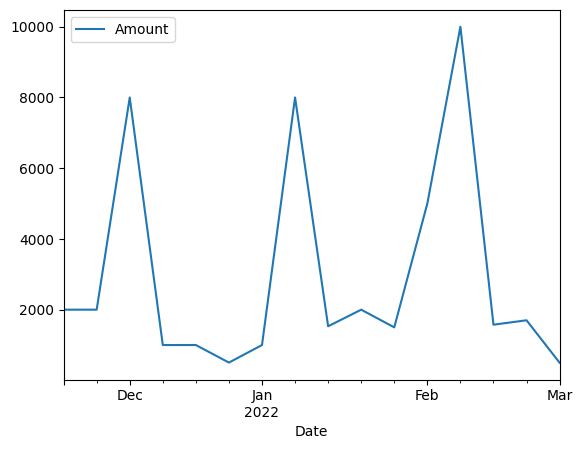

In [104]:
# Max Values per month
data.resample('W').max().plot()

<Axes: xlabel='Date'>

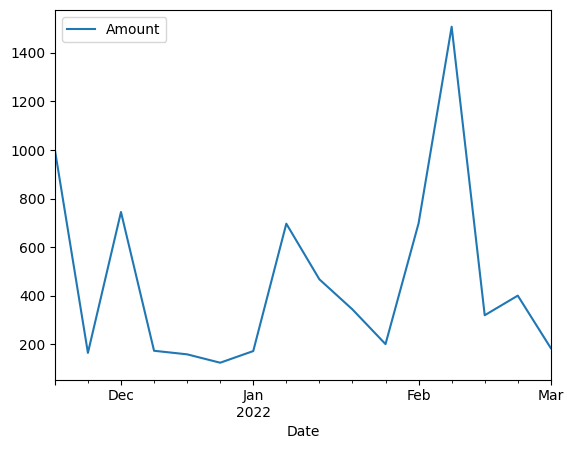

In [105]:
# Avg Values per month
data.resample('W').mean().plot()

### On which date are the expenses highest? What is the difference between those dates?

In [108]:
data.groupby(pd.Grouper(freq="M")).Amount.idxmax()

Date
2021-11-30   2021-11-21 13:30:00
2021-12-31   2021-12-05 12:23:00
2022-01-31   2022-01-04 22:10:00
2022-02-28   2022-02-12 14:47:00
2022-03-31   2022-03-01 18:21:00
Freq: M, Name: Amount, dtype: datetime64[ns]

In [110]:
summary=data.groupby(pd.Grouper(freq="M")).agg(
    max_Expense = pd.NamedAgg(column='Amount', aggfunc='max'),
    max_Date = pd.NamedAgg(column='Amount', aggfunc='idxmax'))

In [111]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-31 days +14:13:00')

In [112]:
summary

,max_Expense,max_Date
Date,,
2021-11-30,2000.0,2021-11-21 13:30:00
2021-12-31,8000.0,2021-12-05 12:23:00
2022-01-31,8000.0,2022-01-04 22:10:00
2022-02-28,10000.0,2022-02-12 14:47:00
2022-03-31,500.0,2022-03-01 18:21:00


In [113]:
summary.shift(1)

,max_Expense,max_Date
Date,,
2021-11-30,NaN,NaT
2021-12-31,2000.0,2021-11-21 13:30:00
2022-01-31,8000.0,2021-12-05 12:23:00
2022-02-28,8000.0,2022-01-04 22:10:00
2022-03-31,10000.0,2022-02-12 14:47:00


In [114]:
summary-summary.shift(1)

,max_Expense,max_Date
Date,,
2021-11-30,NaN,NaT
2021-12-31,6000.0,13 days 22:53:00
2022-01-31,0.0,30 days 09:47:00
2022-02-28,2000.0,38 days 16:37:00
2022-03-31,-9500.0,17 days 03:34:00


### Interestingly, it turns out that there is a monthly peak every thirty days apart!!

AttributeError: 'Legend' object has no attribute 'legendHandles'

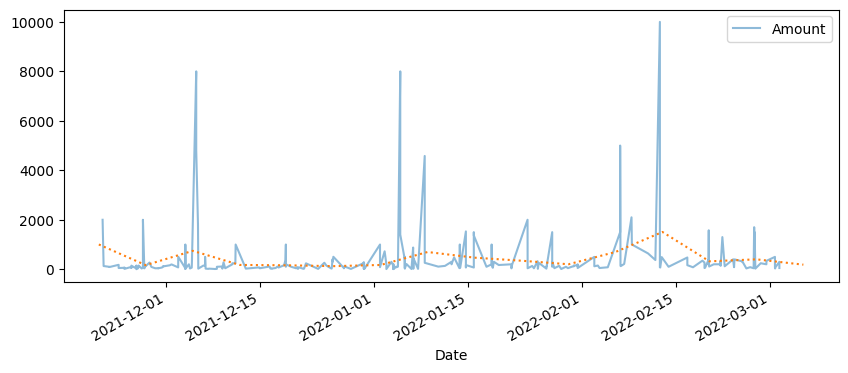

In [117]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
data.plot(alpha=0.5, style='-',ax=ax)
data.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
data.asfreq('W').plot(style='--',ax=ax);          ## Alternate method that also supports padding/backfill of missing values
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

## EXERCISE: Make a plot for the following:

Simple Moving average over a week: The average expenses over the past 7 days

Cumulative Moving average: Average of all the expenses incurred thus far

Exponential Moving Average: EW(t)=a.X(t)+(1-a).EW(t-1) ; EW(1)=X(1) 

## Is this series stationary? Does it appear to have a constant mean? Let's apply some statistical tests ....

### If the p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0. An ARIMA model/analysis can help us figure out how much differencing is needed. Or we can continue differencing on the original series till it passes the adfuller test.

This test itself builds a regression model.....

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

https://www.youtube.com/watch?v=2GxWgIumPTA

https://www.youtube.com/watch?v=X8nGZ2UCJsk

Called Unit Root test because it solves the equation: X(t) = a+ rho*X(t-1) + epsilon


## Null hypothesis here is that the series is non-stationary


In [118]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(data['Amount'].dropna())[1])

p-value: 1.037345232898459e-25


In [129]:
print("p-value:", adfuller(data['Amount'].diff().dropna())[1])

p-value: 1.2746531119190986e-19


#### Note that one level of differencing has made the series stationary. Now, we can continue from this point on as well. After the analysis we can reverse the differencing to come up with the final model.

### Let's learn how to decompose the complex time series into components using moving average models
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='multiplicative', period = 30)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [131]:
trend.head()
# First half of the period is empty
# The last half is also empty .. matter of some investigation

Date
2022-03-02 10:11:00   NaN
2022-03-02 10:11:00   NaN
2022-03-01 19:50:00   NaN
2022-03-01 18:56:00   NaN
2022-03-01 18:22:00   NaN
Name: trend, dtype: float64

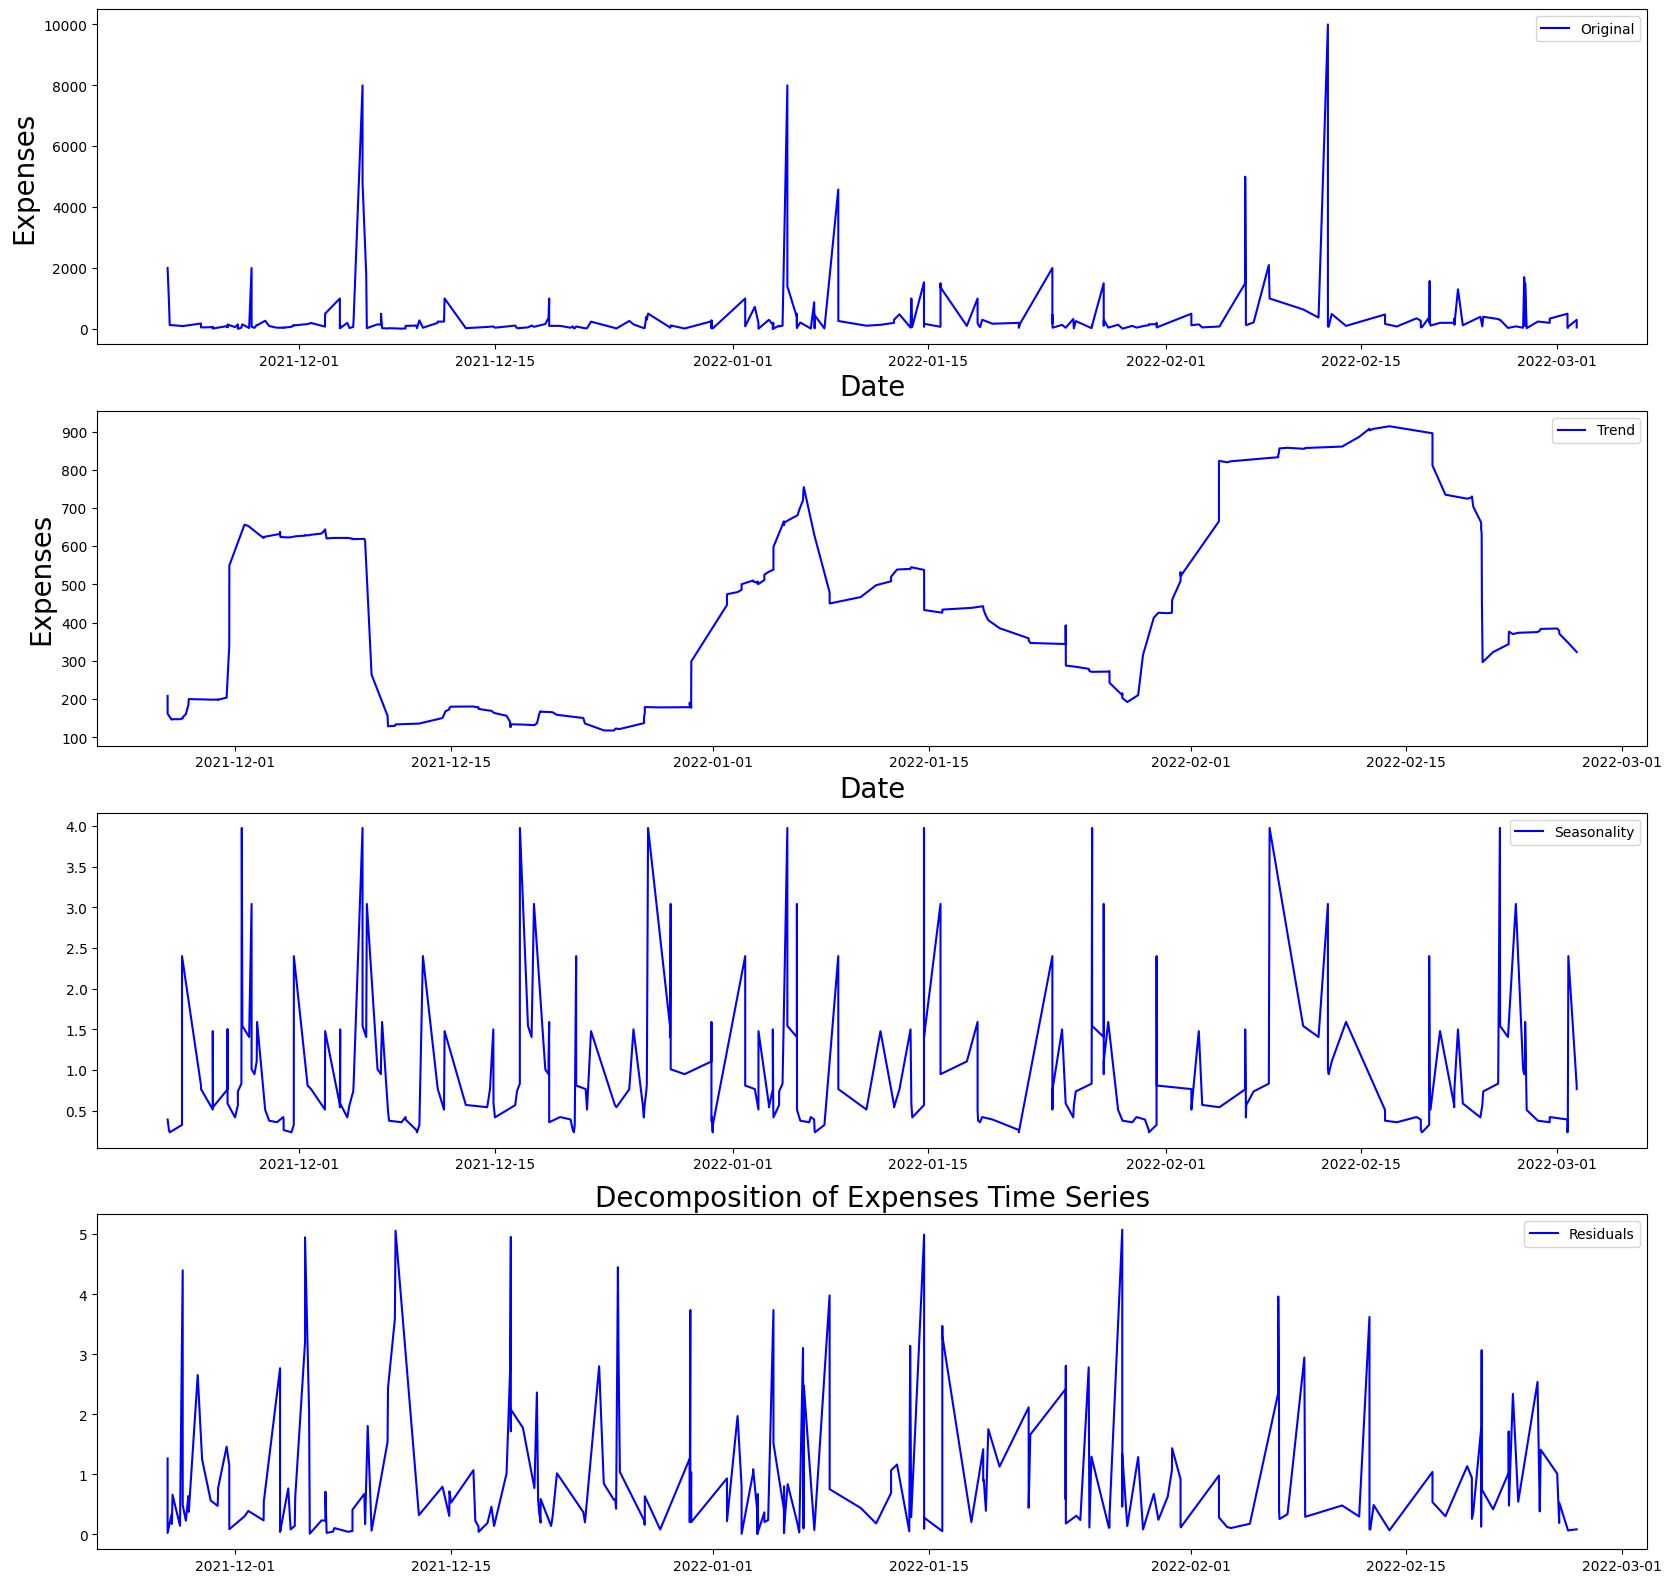

<Figure size 640x480 with 0 Axes>

In [132]:
# Plot gathered statistics
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(data, label='Original', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of Expenses Time Series', fontsize=20)
plt.show()

plt.tight_layout()

In [123]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.010535211545896064


It is obvious that differencing is necessary

## Now I am analysing the Differenced series and decomposing it

In [124]:
data_d = data.diff().dropna()

In [125]:
data_d.shape

(276, 1)

In [126]:
data_d.head(2)

,Amount
Date,
2022-03-02 10:11:00,250.0
2022-03-01 19:50:00,-222.0


AttributeError: 'Legend' object has no attribute 'legendHandles'

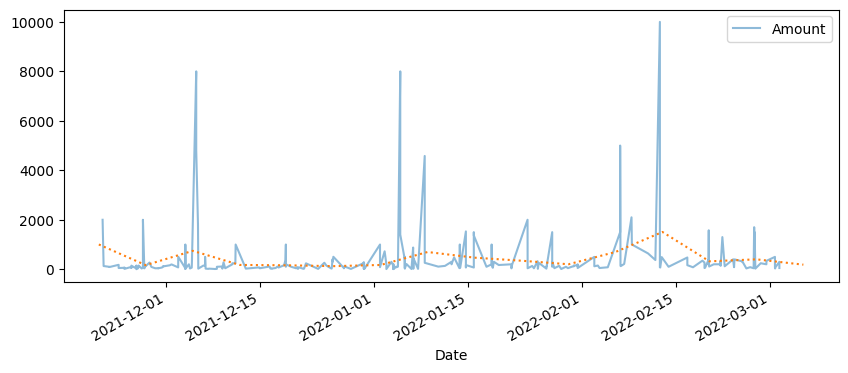

In [133]:

plt.figure(figsize=(10, 4))
ax = plt.gca()
data.plot(alpha=0.5, style='-',ax=ax)
data.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
data.asfreq('W').plot(style='--',ax=ax);          ## Alternate method that also supports padding/backfill of missing values
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

## Since there is no real trend, we need a additive model while doing the decomposition

In [134]:
decomposition_d = seasonal_decompose(data_d, model='additive', period = 30)
trend_d    = pd.DataFrame(decomposition_d.trend.fillna(method='bfill'))     # Backfill missing values
seasonal_d = pd.DataFrame(decomposition_d.seasonal.fillna(method='bfill'))
residual_d = pd.DataFrame(decomposition_d.resid.fillna(method='bfill'))
data_df = pd.DataFrame(decomposition_d.trend+decomposition_d.resid).dropna()

In [135]:
# We can remove the values with nan in the decomposed model, this snippet just prints them out

import math
tt=pd.DataFrame(decomposition_d.trend)

for v in range(0,tt.shape[0]):
    #print (tt.index[v],tt['trend'][v])
    if(math.isnan(tt['trend'][v])):
         print (tt.index[v])

2022-03-02 10:11:00
2022-03-01 19:50:00
2022-03-01 18:56:00
2022-03-01 18:22:00
2022-03-01 18:22:00
2022-03-01 18:21:00
2022-02-28 11:56:00
2022-02-28 11:45:00
2022-02-27 15:29:00
2022-02-26 20:16:00
2022-02-26 17:37:00
2022-02-26 17:37:00
2022-02-26 16:01:00
2022-02-26 14:07:00
2022-02-26 01:39:00
2021-11-26 09:22:00
2021-11-25 20:27:00
2021-11-25 20:27:00
2021-11-25 20:27:00
2021-11-24 19:26:00
2021-11-24 19:23:00
2021-11-24 19:06:00
2021-11-24 19:06:00
2021-11-23 22:53:00
2021-11-23 22:53:00
2021-11-22 14:16:00
2021-11-22 14:16:00
2021-11-21 17:07:00
2021-11-21 15:50:00
2021-11-21 13:30:00


In [136]:
data_df.head(5)
# Note the period shift in the output

,0
Date,
2022-02-25 12:08:00,870.528708
2022-02-24 22:32:00,-72.893515
2022-02-24 22:21:00,-1209.434255
2022-02-24 19:15:00,1697.726856
2022-02-23 17:35:00,269.793522


In [137]:
data_df.shape

(246, 1)

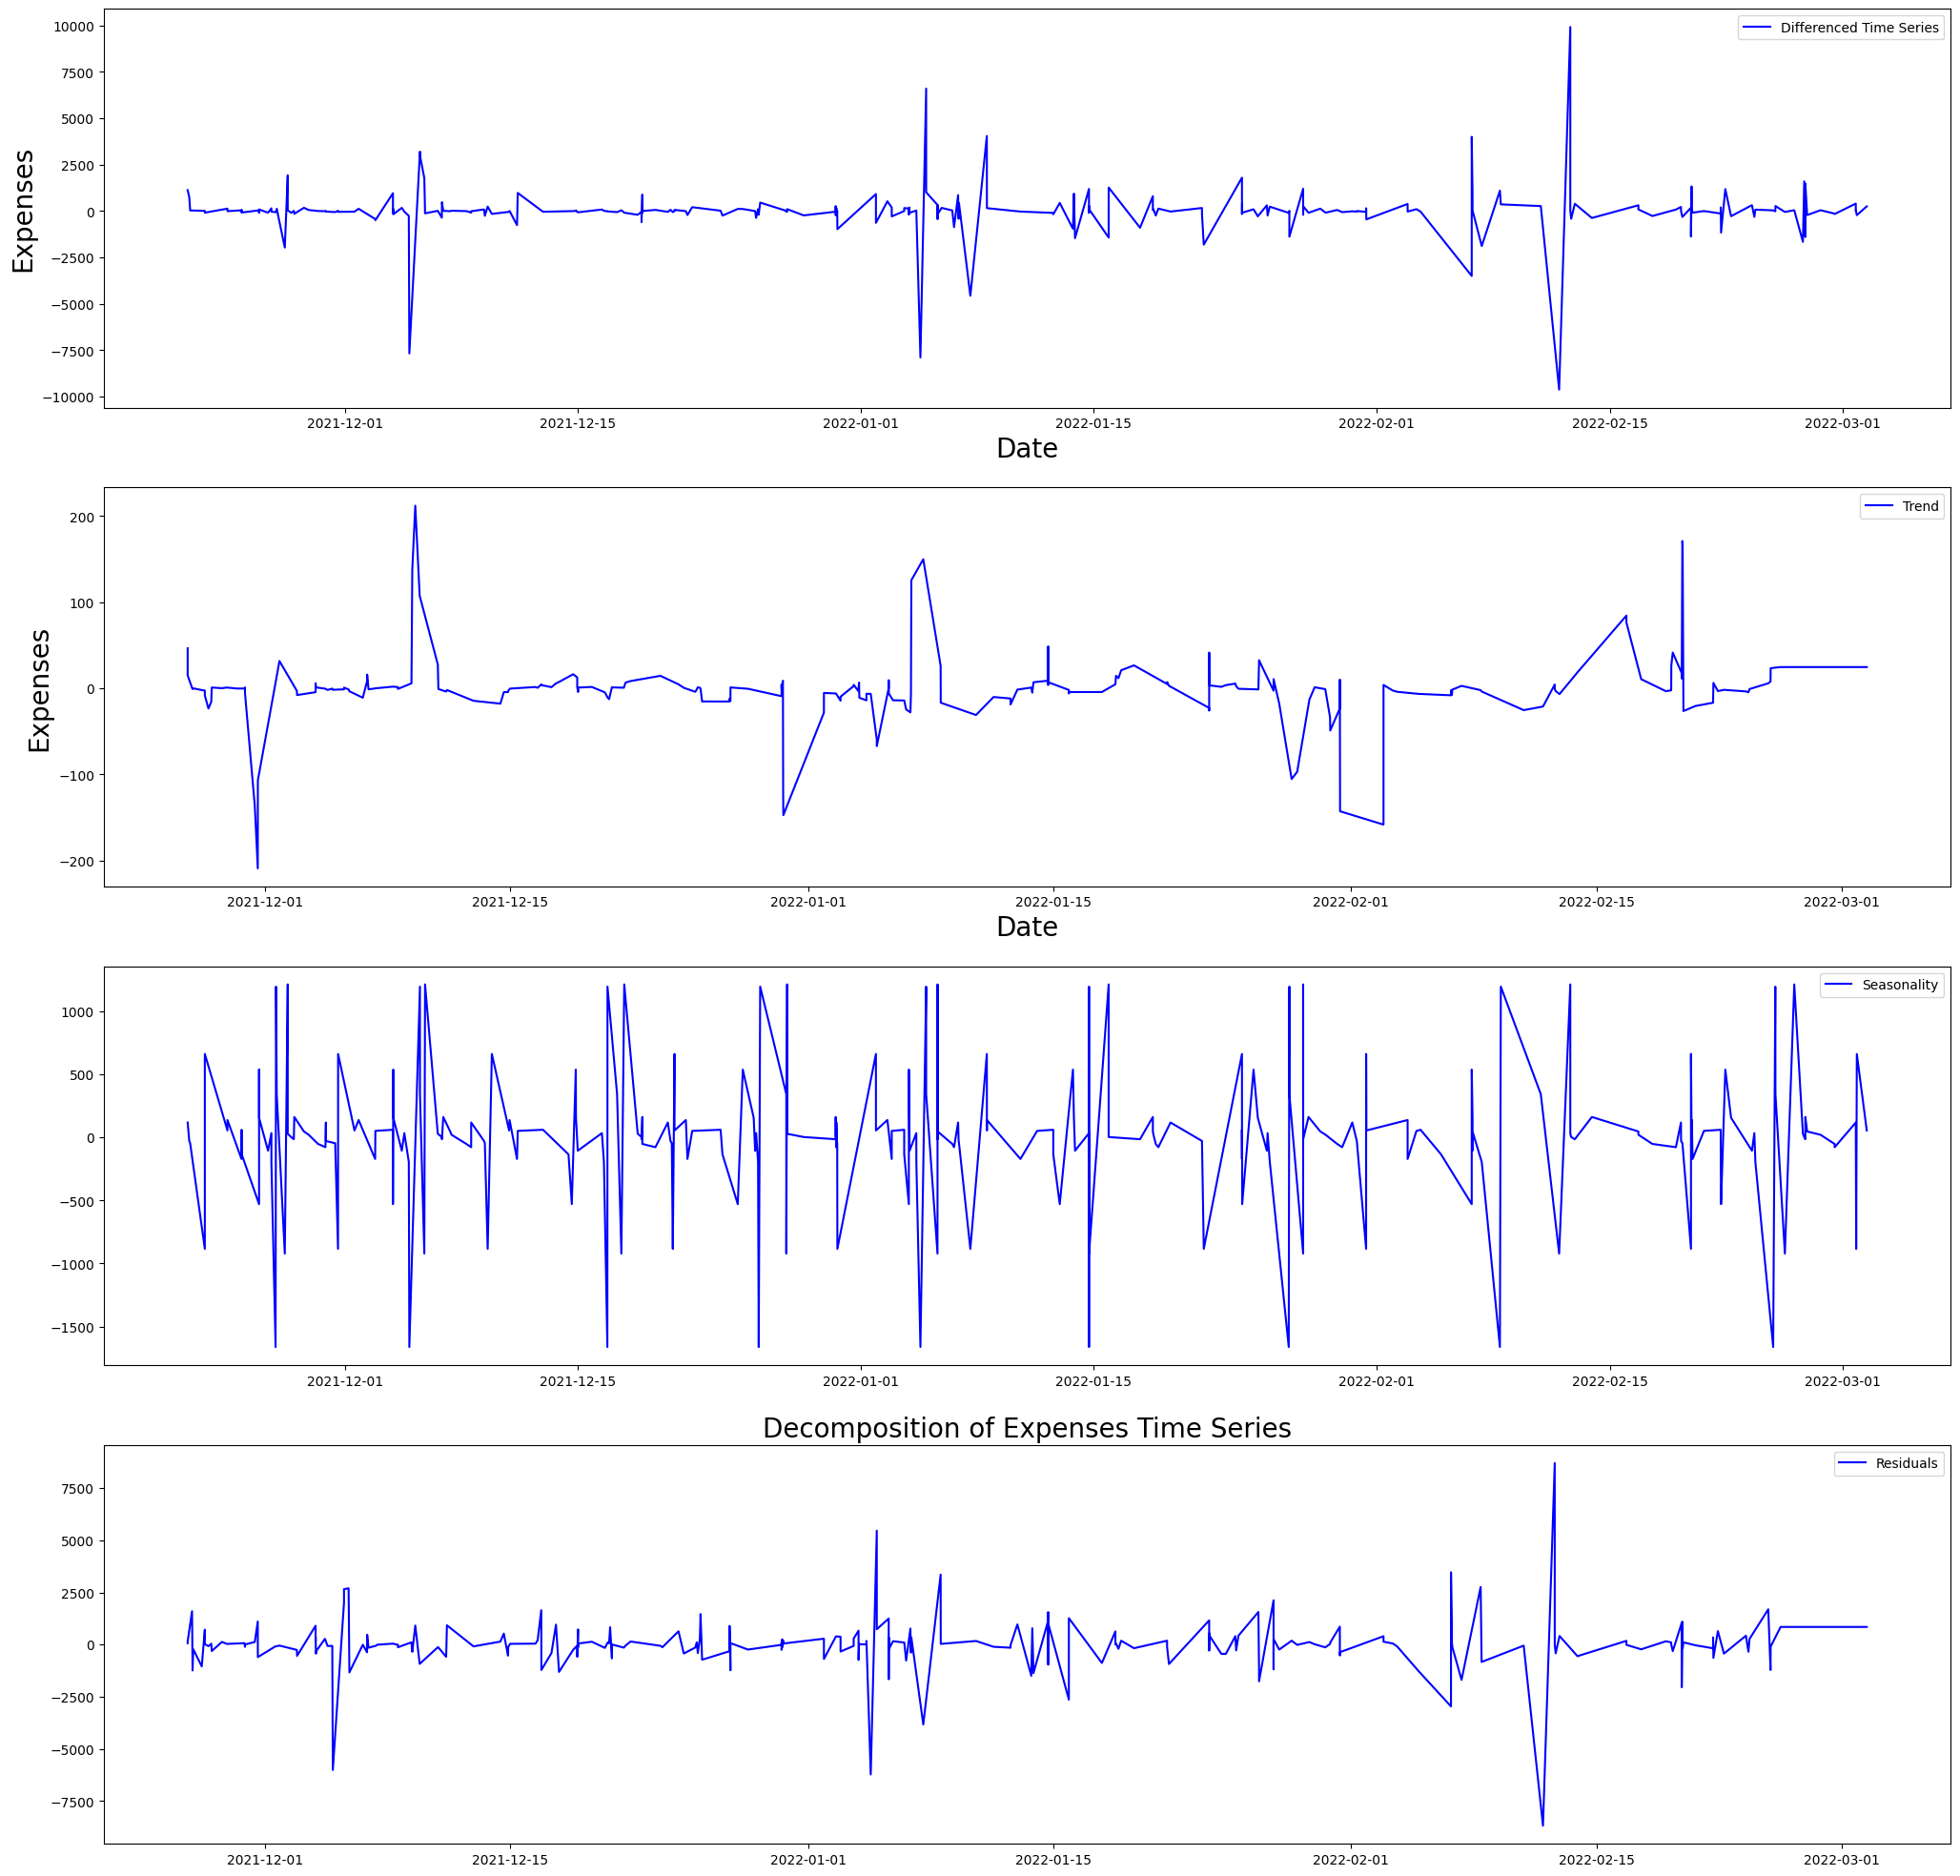

In [138]:
# Plot gathered statistics
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(data_d, label='Differenced Time Series', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend_d, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal_d,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_d, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of Expenses Time Series', fontsize=20)
plt.show()
#plt.tight_layout()

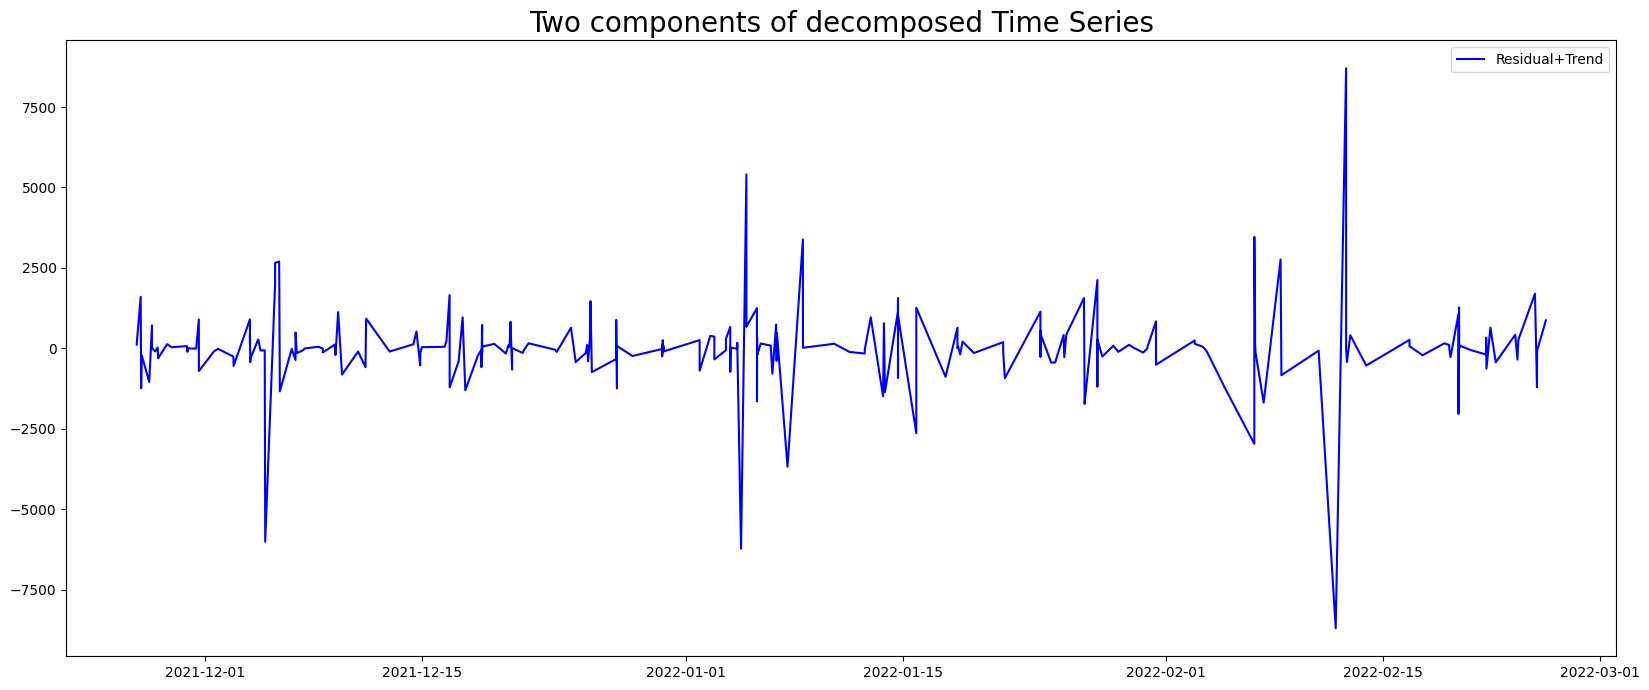

In [139]:
plt.figure(figsize=(20,8))
plt.plot(data_df, label='Residual+Trend', color="blue")
plt.legend(loc='best')
plt.title('Two components of decomposed Time Series', fontsize=20)
plt.show()

In [140]:
seasonal_d.shift(30)

,seasonal
Date,
2022-03-02 10:11:00,NaN
2022-03-01 19:50:00,NaN
2022-03-01 18:56:00,NaN
2022-03-01 18:22:00,NaN
2022-03-01 18:22:00,NaN
...,...
2021-11-22 14:16:00,661.520829
2021-11-22 14:16:00,-883.808337
2021-11-21 17:07:00,-46.408962


In [141]:
seasonal_dd=seasonal_d-seasonal_d.shift(30)

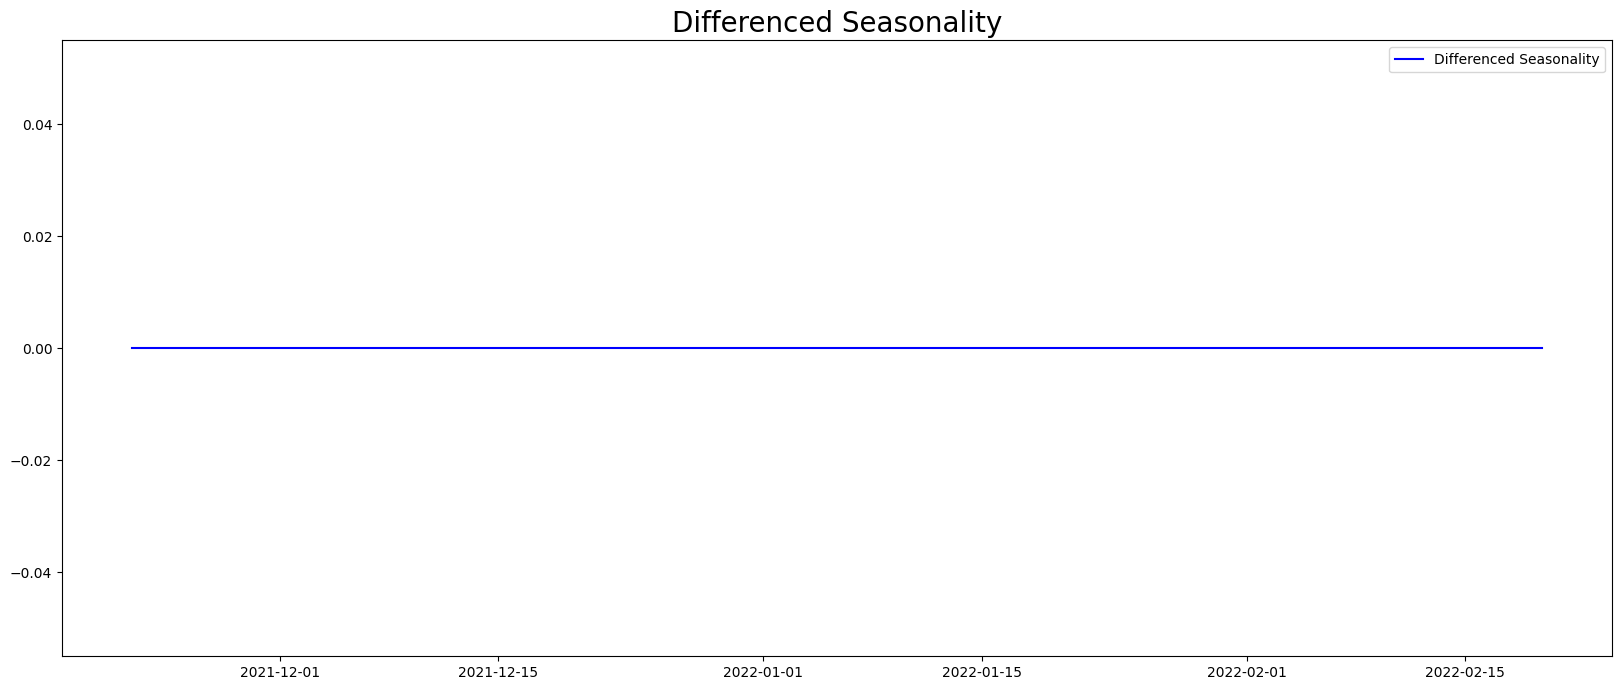

In [142]:
plt.figure(figsize=(20,8))
plt.plot(seasonal_dd, label='Differenced Seasonality', color="blue")
plt.legend(loc='best')
plt.title('Differenced Seasonality', fontsize=20)
plt.show()

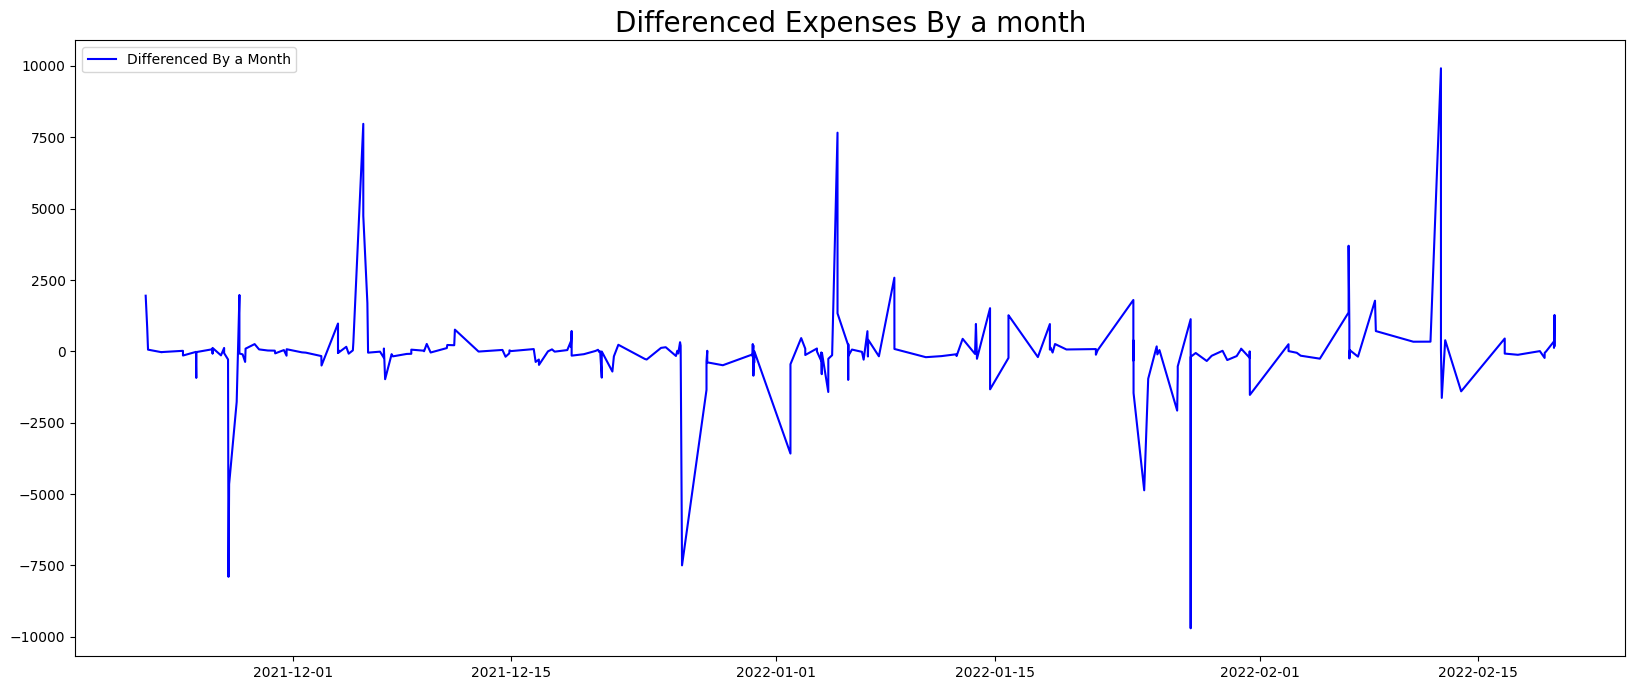

In [143]:
plt.figure(figsize=(20,8))
data_d30=data-data.shift(30)
plt.plot(data_d30, label='Differenced By a Month', color="blue")
plt.legend(loc='best')
plt.title('Differenced Expenses By a month', fontsize=20)
plt.show()

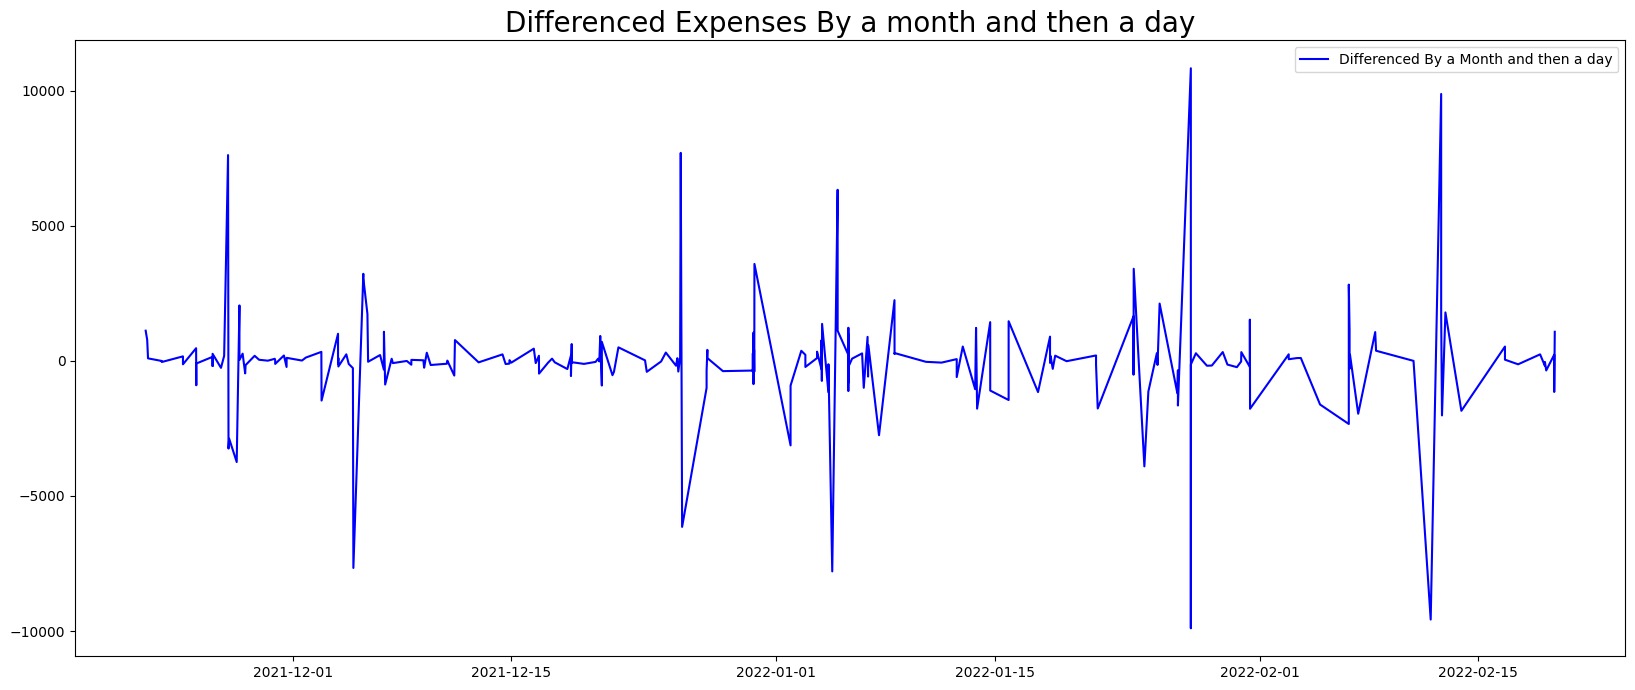

In [144]:
plt.figure(figsize=(20,8))
data_d30_d1=data_d30-data_d30.shift(1)
plt.plot(data_d30_d1, label='Differenced By a Month and then a day', color="blue")
plt.legend(loc='best')
plt.title('Differenced Expenses By a month and then a day', fontsize=20)
plt.show()

## Can we model the trend of the original (non-differenced) series but without seasonality??

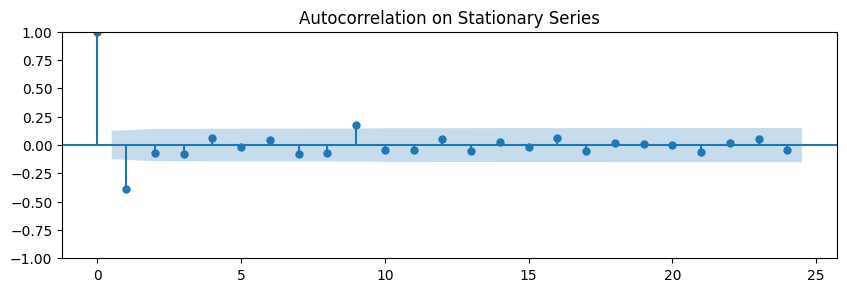

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(data_d30_d1.dropna(), ax=ax1, 
               title="Autocorrelation on Stationary Series") 

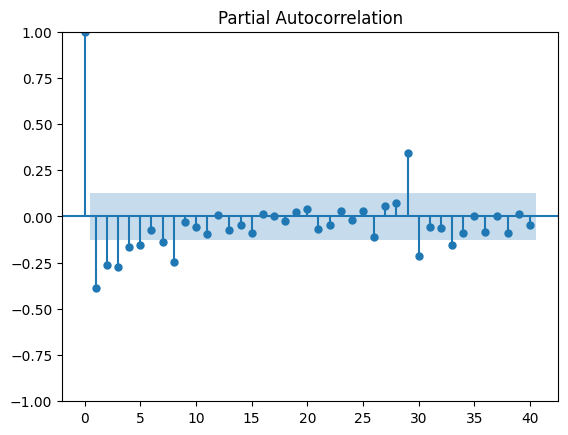

In [146]:
plt.close('all')
plot_pacf(data_d30_d1.dropna(), lags=40)
plt.show()

## Guessing the parameters of ARIMA manually

In [150]:
from statsmodels.tsa.arima_model import ARIMA


# Fit the model
model = ARIMA(data_d30_d1.dropna(), order=(2, 0, 2))
results = model.fit()

# Summary or forecast
print(results.summary())


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [148]:
results.summary()

NameError: name 'results' is not defined

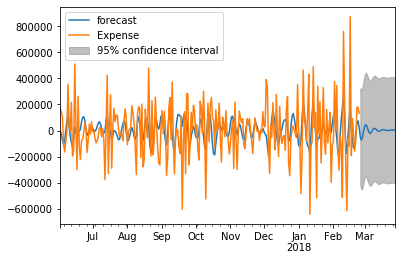

In [56]:
results.plot_predict(1, 300)
plt.show()

In [145]:
pred=results.forecast()

In [59]:
# Perform Fourier transform using scipy
Fs=100.0
from scipy import fftpack
y_fft = fftpack.fft(seasonal.values)

In [60]:
y_fft

array([ 3.00000000e+02-0.00000000e+00j,  1.28389633e-15-4.01765519e-16j,
        7.03513137e-16-6.07483351e-16j,  2.99917282e-16-6.93442022e-16j,
       -7.38580039e-17-6.56325779e-16j, -3.49720253e-15+3.99680289e-15j,
        7.36048578e-16+2.13064082e-16j,  8.92272839e-16-2.53608860e-16j,
        7.56897814e-16-9.86114277e-16j, -1.57119086e-16-2.26169830e-15j,
       -2.23060778e+01-1.99294427e+00j, -1.84170094e-15-2.43207438e-16j,
       -7.25638147e-16+5.52555098e-16j, -7.06698694e-17+6.15903718e-16j,
        2.07050095e-16+2.87400530e-16j, -3.33066907e-16+4.44089210e-16j,
       -1.67558756e-16+2.15622337e-16j, -8.26527621e-17+6.32950098e-16j,
        4.82875328e-16+7.52783506e-16j,  9.28302477e-16-2.33400561e-16j,
        1.59616075e+01+3.12852563e+00j,  8.75786458e-17-1.00929586e-15j,
       -1.79300407e-17-7.78316775e-16j, -3.11403186e-16-4.11016608e-16j,
       -3.52448443e-16-8.04718097e-17j, -8.88178420e-16+8.88178420e-15j,
        3.45347710e-16-2.85980440e-16j, -2.38923056

C:\Users\gagan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

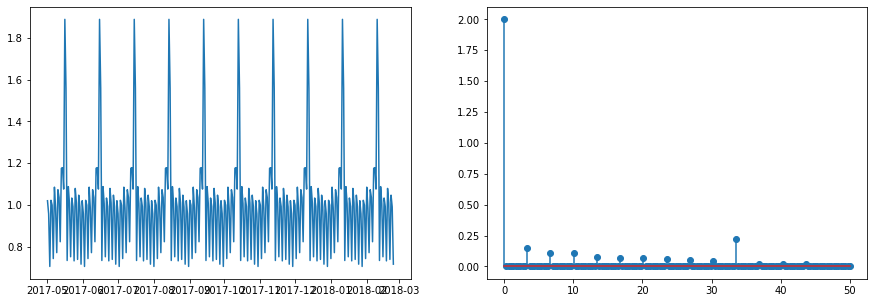

In [61]:
# Plot data
n = np.size(data['Expense'])
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(data.index,seasonal)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain